Questions needing answers:
1. What are the top 100 most popular(Grossing) movies Domestic/Foreign? Top grossing, collectively
3. What are the top 5 most popular genres both Domestic and Worldwide based on their gross?
4. What are the top three genres with the highest reviews? (Comparing numbered reviews and then letter reviews, seperatly)
# 5. What genres are watched the most during each season? ( Winter, Spring, Summer, Fall)

In [233]:
import pandas as pd
import os
from glob import glob

In [234]:
# glob finds all the files in a specified directory that match the condition
# we do this so we can open multiple files at once
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [235]:
# tsv files, because later tsv files need to be opened with sep='\t'
tsv_files = glob("./zippedData/*.tsv.gz")
tsv_files

['./zippedData/rt.movie_info.tsv.gz']

In [236]:
data_dict = {}

for file in csv_files:
    data_dict[file] = pd.read_csv(file)
    
for file in tsv_files:
    data_dict[file] = pd.read_csv(file, sep='\t', encoding= 'unicode_escape') 

In [237]:
# beginning to solve for the highest grossing movies. Pulling budget dataframe into pandas to
# start breaking down and cleaning up the df.
data_dict['./zippedData/tn.movie_budgets.csv.gz']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [238]:
# Assigning this specific df to a def for easy referral throughout cleaning
mb=data_dict['./zippedData/tn.movie_budgets.csv.gz']

In [239]:
# Tells me that I need to convert the last three columns into int64 changing them from a 
# string to a numerical value
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [240]:
mb.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [241]:
mb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [243]:
# Removing the $ sign from the currency columns to convert them from an object to an integer
mb['production_budget'] = mb['production_budget'].replace({'\$':''}, regex = True)
mb['domestic_gross'] = mb['domestic_gross'].replace({'\$':''}, regex = True)
mb['worldwide_gross'] = mb['worldwide_gross'].replace({'\$':''}, regex = True)
mb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [244]:
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [245]:
mb1 = mb.iloc[0:, 1:]

In [246]:
# Removing the thousand comma seperator from the monetary values
mb1['production_budget'] = mb1['production_budget'].replace({'\,':''}, regex = True)
mb1['domestic_gross'] = mb1['domestic_gross'].replace({'\,':''}, regex = True)
mb1['worldwide_gross'] = mb1['worldwide_gross'].replace({'\,':''}, regex = True)
mb1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [247]:
mb1["production_budget"] = mb1["production_budget"].astype(str).astype(int)
mb1["domestic_gross"] = mb1["domestic_gross"].astype(str).astype(int)
mb1["worldwide_gross"] = mb1["worldwide_gross"].astype(str).astype(int)
mb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [248]:
# Finding profit values for each movie worldwide

mb1['production_profit_worldwide'] = mb1['worldwide_gross'] - mb1['production_budget']
mb1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [249]:
# Finding profit values domestically

mb1['production_profit_domestic'] = mb1['domestic_gross'] - mb1['production_budget']
mb1.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382


In [310]:
mb1['production_budget']=round(mb1['production_budget'].map(lambda x: x/1000000, 2))
mb1['worldwide_gross']=round(mb1['worldwide_gross'].map(lambda x: x/1000000, 2))
mb1['production_profit_worldwide']=round(mb1['production_profit_worldwide'].map(lambda x: x/1000000, 2))

In [311]:
mb1

,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
0,"Dec 18, 2009",Avatar,425.0,760507625,2776.0,2351.0,335507625
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,411.0,241063875,1046.0,635.0,-169536125
2,"Jun 7, 2019",Dark Phoenix,350.0,42762350,150.0,-200.0,-307237650
3,"May 1, 2015",Avengers: Age of Ultron,331.0,459005868,1403.0,1072.0,128405868
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620181382,1317.0,1000.0,303181382
...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,0.0,0,0.0,-0.0,-7000
5778,"Apr 2, 1999",Following,0.0,48482,0.0,0.0,42482
5779,"Jul 13, 2005",Return to the Land of Wonders,0.0,1338,0.0,-0.0,-3662
5780,"Sep 29, 2015",A Plague So Pleasant,0.0,0,0.0,-0.0,-1400


In [250]:
sorted_worldwide_profit = mb1.sort_values(['production_profit_worldwide'], ascending=False)
sorted_worldwide_profit

,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625
42,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,459363944
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,437270625
...,...,...,...,...,...,...,...
352,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,-98287549
341,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,-106900000
193,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,-128607242
194,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,-150000000


In [251]:
sorted_domestic_profit = mb1.sort_values(['production_profit_domestic'], ascending=False)
sorted_domestic_profit

,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225
41,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,500059566
42,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,459363944
3464,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,775598007,449998007
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,437270625
...,...,...,...,...,...,...,...
31,"May 18, 2012",Battleship,220000000,65233400,313477717,93477717,-154766600
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-14997885,-185697885
13,"Mar 9, 2012",John Carter,275000000,73058679,282778100,7778100,-201941321


In [252]:
sorted_domestic_profit.head(100)#[['id'],['movie', 'production_budget', 'domestic gross', 'production_profit_domestic']]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225
41,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,500059566
42,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,459363944
3464,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,775598007,449998007
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,437270625
...,...,...,...,...,...,...,...
432,"Nov 5, 2004",The Incredibles,92000000,261441092,614726752,522726752,169441092
1375,"Jul 15, 2005",Wedding Crashers,40000000,209218368,283218368,243218368,169218368
1083,"Jun 29, 2012",Ted,50000000,218665740,556016627,506016627,168665740
153,"Jul 2, 2007",Transformers,151000000,319246193,708272592,557272592,168246193


In [253]:
domesticdf = sorted_domestic_profit[['production_budget', 'domestic_gross', 'production_profit_domestic']]

In [254]:
domesticdf.to_csv('domesticdf.csv', index=False)

In [269]:
internationaldf = sorted_worldwide_profit[['movie', 'production_budget', 'worldwide_gross', 'production_profit_worldwide']]
internationaldf.head(100)

,movie,production_budget,worldwide_gross,production_profit_worldwide
0,Avatar,425000000,2776345279,2351345279
42,Titanic,200000000,2208208395,2008208395
6,Avengers: Infinity War,300000000,2048134200,1748134200
5,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220
33,Jurassic World,215000000,1648854864,1433854864
...,...,...,...,...
2159,The Passion of the Christ,25000000,622341924,597341924
49,Spider-Man 2,200000000,795110670,595110670
126,Shrek Forever After,165000000,756244673,591244673
159,The Matrix Reloaded,150000000,738576929,588576929


In [270]:
top100int_df = internationaldf.head(100)
top100int_df

,movie,production_budget,worldwide_gross,production_profit_worldwide
0,Avatar,425000000,2776345279,2351345279
42,Titanic,200000000,2208208395,2008208395
6,Avengers: Infinity War,300000000,2048134200,1748134200
5,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,1747311220
33,Jurassic World,215000000,1648854864,1433854864
...,...,...,...,...
2159,The Passion of the Christ,25000000,622341924,597341924
49,Spider-Man 2,200000000,795110670,595110670
126,Shrek Forever After,165000000,756244673,591244673
159,The Matrix Reloaded,150000000,738576929,588576929


In [257]:
top100dom_df = sorted_domestic_profit.head(100)
top100dom_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225
41,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,500059566
42,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,459363944
3464,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,775598007,449998007
33,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,437270625
...,...,...,...,...,...,...,...
432,"Nov 5, 2004",The Incredibles,92000000,261441092,614726752,522726752,169441092
1375,"Jul 15, 2005",Wedding Crashers,40000000,209218368,283218368,243218368,169218368
1083,"Jun 29, 2012",Ted,50000000,218665740,556016627,506016627,168665740
153,"Jul 2, 2007",Transformers,151000000,319246193,708272592,557272592,168246193


In [258]:
import matplotlib.pyplot as plt

In [259]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [260]:
mb1.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'production_profit_worldwide',
       'production_profit_domestic'],
      dtype='object')

In [271]:
top100int_df['production_budget']=round(top100int_df['production_budget'].map(lambda x: x/1000000, 2))
top100int_df['worldwide_gross']=round(top100int_df['worldwide_gross'].map(lambda x: x/1000000, 2))
top100int_df['production_profit_worldwide']=round(top100int_df['production_profit_worldwide'].map(lambda x: x/1000000, 2))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [273]:
top100int_df

,movie,production_budget,worldwide_gross,production_profit_worldwide
0,Avatar,425.0,2776.0,2351.0
42,Titanic,200.0,2208.0,2008.0
6,Avengers: Infinity War,300.0,2048.0,1748.0
5,Star Wars Ep. VII: The Force Awakens,306.0,2053.0,1747.0
33,Jurassic World,215.0,1649.0,1434.0
...,...,...,...,...
2159,The Passion of the Christ,25.0,622.0,597.0
49,Spider-Man 2,200.0,795.0,595.0
126,Shrek Forever After,165.0,756.0,591.0
159,The Matrix Reloaded,150.0,739.0,589.0


In [284]:
top50int_df=top100int_df.head(50)
top50int_df

,movie,production_budget,worldwide_gross,production_profit_worldwide
0,Avatar,425.0,2776.0,2351.0
42,Titanic,200.0,2208.0,2008.0
6,Avengers: Infinity War,300.0,2048.0,1748.0
5,Star Wars Ep. VII: The Force Awakens,306.0,2053.0,1747.0
33,Jurassic World,215.0,1649.0,1434.0
66,Furious 7,190.0,1519.0,1329.0
26,The Avengers,225.0,1518.0,1293.0
260,Harry Potter and the Deathly Hallows: Part II,125.0,1342.0,1217.0
41,Black Panther,200.0,1348.0,1148.0
112,Jurassic World: Fallen Kingdom,170.0,1306.0,1136.0


In [275]:
# top50int_df['index'] = pd.RangeIndex(0,51).to_series()
# top50int_df.loc[1,5] = 1

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [285]:
top50int_df

,movie,production_budget,worldwide_gross,production_profit_worldwide
0,Avatar,425.0,2776.0,2351.0
42,Titanic,200.0,2208.0,2008.0
6,Avengers: Infinity War,300.0,2048.0,1748.0
5,Star Wars Ep. VII: The Force Awakens,306.0,2053.0,1747.0
33,Jurassic World,215.0,1649.0,1434.0
66,Furious 7,190.0,1519.0,1329.0
26,The Avengers,225.0,1518.0,1293.0
260,Harry Potter and the Deathly Hallows: Part II,125.0,1342.0,1217.0
41,Black Panther,200.0,1348.0,1148.0
112,Jurassic World: Fallen Kingdom,170.0,1306.0,1136.0


In [286]:
top100int_df.to_csv('top_int_100', index=True)

In [278]:
# import plotly.express as px
# top100int_df = px.data.iris()
# fig = px.scatter(top100int_df, x="sepal_width", y="sepal_length", color="species",
#                  size='petal_length', hover_data=['petal_width'])
# fig.show()

In [296]:
import plotly.graph_objects as go

data= pd.read_csv("top_int_100")

fig = go.Figure(data=go.Scatter(x=data['production_budget'],
                                y=data['production_profit_worldwide'],
                                mode='markers',
                                marker_color=data['production_profit_worldwide'],
                                text=data['movie'])) # hover text goes here

fig.update_layout(title='Budget vs. Profitability Worldwide (Millions)')
fig.show()


AttributeError: 'Figure' object has no attribute 'legend'

<function matplotlib.pyplot.show(*args, **kw)>

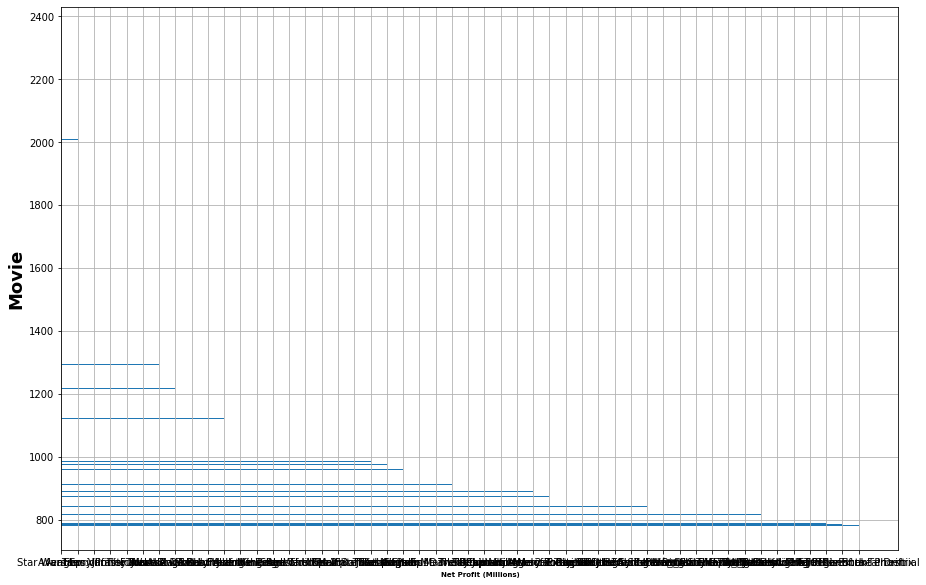

In [297]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
x = top50int_df['production_profit_worldwide']
y = top50int_df['movie']
df = pd.DataFrame({'x':top50int_df['production_profit_worldwide'], 'y':top50int_df['movie']})
plt.ylabel('Movie', fontsize = 18, weight = 'bold')
plt.xlabel('Net Profit (Millions)', fontsize = 7, weight = 'bold')
ax.barh(df.x, df.y)
plt.grid()
plt.show

In [ ]:

# sns.scatterplot(x=mb1['production_budget'], y=mb1['production_profit_worldwide'], 
#                     hue=None, style=None,  
#                     size=None, data=None, palette=None, hue_order=None, 
#                     hue_norm=None, sizes=None, size_order=None, size_norm=None, 
#                     markers=True, style_order=None, x_bins=None, y_bins=None, 
#                     units=None, 
#                     estimator=None, ci='sd', n_boot=1000, alpha='auto', x_jitter=None, 
#                     y_jitter=None, legend='brief', ax=None)

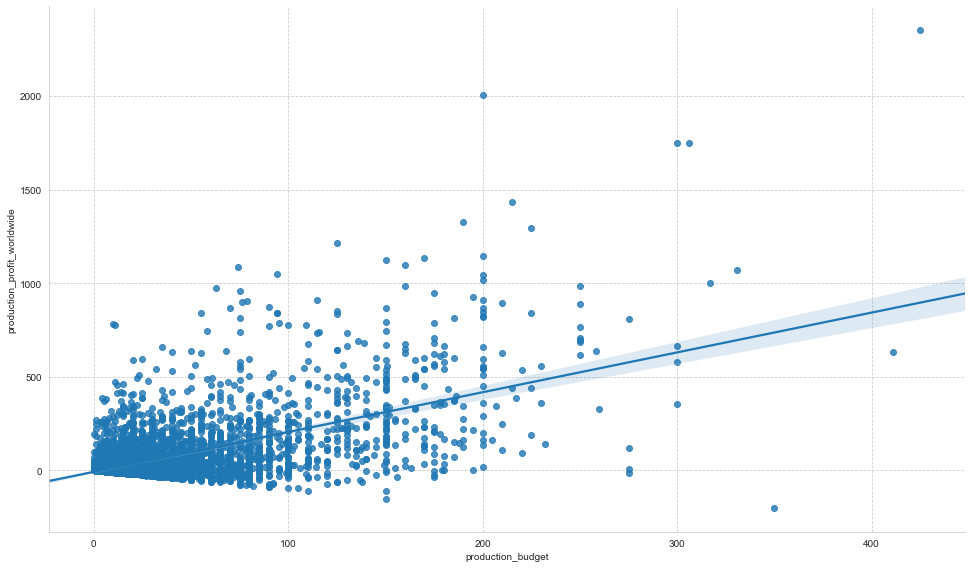

In [314]:
sns.lmplot('production_budget', 'production_profit_worldwide', mb1, hue=None, col=None, 
               row=None, palette=None, col_wrap=None, height=8, aspect=1.7, markers='o', 
               sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, 
               legend=True, legend_out=True, x_estimator=None, 
               x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None,
               order=1, logistic=False, lowess=False, robust=False, logx=False)

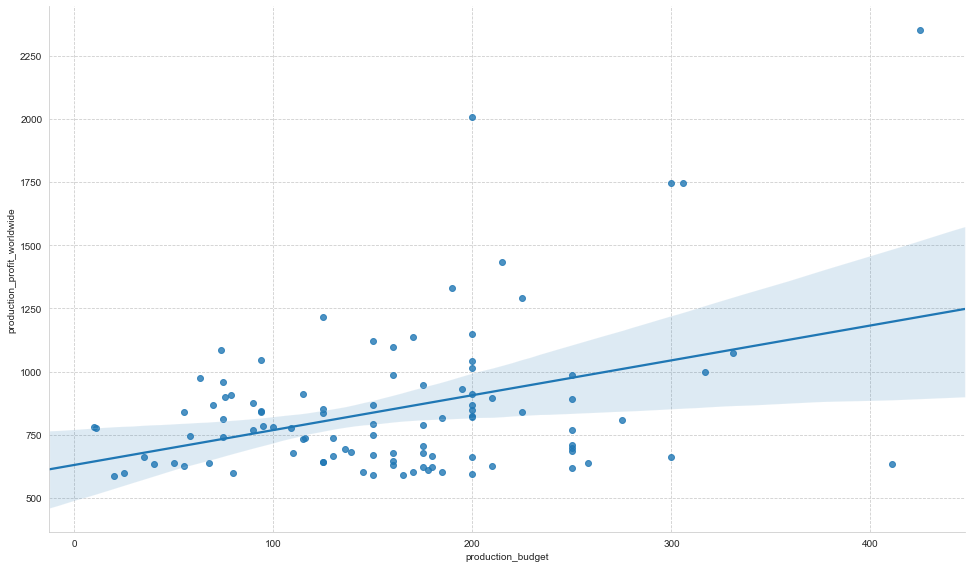

In [316]:
sns.lmplot('production_budget', 'production_profit_worldwide', top100int_df, hue=None, col=None, 
               row=None, palette=None, col_wrap=None, 
               height=8, aspect=1.7, markers='o', sharex=True, sharey=True, hue_order=None, 
               col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, 
               x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None,
               order=1, logistic=False, lowess=False, robust=False, logx=False)